In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
file_path = 'E:/Data Science Project/Unified Mentor Project/Intership Project/Project 7_Crop Production Analysis in India/Crop Production data.csv'
crop_production = pd.read_csv(file_path)

# Displaying first few rows of the dataset
crop_production.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
# Checking for missing values
missing_values = crop_production.isnull().sum()
print("Missing Values:\n", missing_values)

# Removing duplicates
crop_production.drop_duplicates(inplace=True)

# Handling outliers (example: using IQR method)
Q1 = crop_production['Production'].quantile(0.25)
Q3 = crop_production['Production'].quantile(0.75)
IQR = Q3 - Q1
production_outliers = (crop_production['Production'] < (Q1 - 1.5 * IQR)) | (crop_production['Production'] > (Q3 + 1.5 * IQR))
crop_production = crop_production[~production_outliers]

# Example of data normalization (using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
crop_production[['Area', 'Production']] = scaler.fit_transform(crop_production[['Area', 'Production']])

# Example of encoding categorical variables (using pandas get_dummies for illustration)
crop_production_encoded = pd.get_dummies(crop_production, columns=['State_Name', 'District_Name', 'Season', 'Crop'], drop_first=True)

# Display cleaned and preprocessed data
print("Cleaned and Preprocessed Data:")
print(crop_production_encoded.head())


Missing Values:
 State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64
Cleaned and Preprocessed Data:
   Crop_Year      Area  Production  State_Name_Andhra Pradesh  \
0       2000  0.001613    0.114804                      False   
1       2000  0.000003    0.000057                      False   
2       2000  0.000131    0.018426                      False   
3       2000  0.000226    0.036795                      False   
4       2000  0.000926    0.009471                      False   

   State_Name_Arunachal Pradesh  State_Name_Assam  State_Name_Bihar  \
0                         False             False             False   
1                         False             False             False   
2                         False             False             False   
3                         False             False             False   
4                         False        

In [6]:
# Feature Engineering: Creating a new feature 'Productivity' (Production per Area)
crop_production['Productivity'] = crop_production['Production'] / crop_production['Area']

# Selecting relevant features for modeling
selected_features = ['Crop_Year', 'Season', 'Crop', 'Area', 'Productivity']

# Subset the data with selected features
crop_production_selected = crop_production[selected_features]

# Display the first few rows of the selected data
print("Selected Features Data:")
print(crop_production_selected.head())


Selected Features Data:
   Crop_Year       Season                 Crop      Area  Productivity
0       2000  Kharif                  Arecanut  0.001613     71.171941
1       2000  Kharif       Other Kharif pulses  0.000003     22.767032
2       2000  Kharif                      Rice  0.000131    140.487505
3       2000  Whole Year                Banana  0.000226    162.557335
4       2000  Whole Year             Cashewnut  0.000926     10.226760


In [9]:
# Check the structure of the dataset
print("Dataset Shape:", crop_production.shape)
print("\nColumn Names:\n", crop_production.columns)

# Summary statistics
print("\nSummary Statistics:\n", crop_production.describe())

# Check for missing values
print("\nMissing Values:\n", crop_production.isnull().sum())

# Type 2: Numerical Output of visualization (example: Average Production by Crop)
avg_production_by_crop = crop_production.groupby('Crop')['Production'].mean().sort_values(ascending=False)
print("\nAverage Production by Crop:\n", avg_production_by_crop.head(10))


Dataset Shape: (203701, 8)

Column Names:
 Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Productivity'],
      dtype='object')

Summary Statistics:
            Crop_Year           Area     Production   Productivity
count  203701.000000  203701.000000  199971.000000  199971.000000
mean     2005.668308       0.002850       0.110851     150.165567
std         4.927363       0.010257       0.196068    3177.074877
min      1997.000000       0.000000       0.000000       0.000000
25%      2002.000000       0.000066       0.002928      20.838752
50%      2006.000000       0.000386       0.020493      38.139774
75%      2010.000000       0.002058       0.114804      79.192733
max      2015.000000       1.000000       1.000000  678926.183423

Missing Values:
 State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
Productivity     3730
dtype: int

In [11]:
# Handling Missing Values
crop_production['Production'].fillna(crop_production['Production'].mean(), inplace=True)
crop_production['Productivity'].fillna(crop_production['Productivity'].mean(), inplace=True)

# Drop any remaining rows with missing values (if any)
crop_production.dropna(inplace=True)

# Remove Unwanted Columns (if necessary)
# Example: Removing 'Productivity' column since it's not mentioned in the initial dataset description
if 'Productivity' in crop_production.columns:
    crop_production.drop(['Productivity'], axis=1, inplace=True)

# Remove duplicates (if any)
crop_production.drop_duplicates(inplace=True)

# Normalize or standardize data if necessary (Example: Min-Max scaling for 'Area' and 'Production')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
crop_production[['Area', 'Production']] = scaler.fit_transform(crop_production[['Area', 'Production']])

# Encode categorical variables (Example: One-hot encoding for 'Season' and 'Crop')
crop_production = pd.get_dummies(crop_production, columns=['Season', 'Crop'])

# Display the cleaned and preprocessed data
print("Cleaned and Preprocessed Data:\n", crop_production.head())

# Export cleaned and normalized data (if needed)
# crop_production.to_csv('cleaned_crop_production.csv', index=False)


Cleaned and Preprocessed Data:
                     State_Name District_Name  Crop_Year      Area  Production  \
0  Andaman and Nicobar Islands      NICOBARS       2000  0.001613    0.114804   
1  Andaman and Nicobar Islands      NICOBARS       2000  0.000003    0.000057   
2  Andaman and Nicobar Islands      NICOBARS       2000  0.000131    0.018426   
3  Andaman and Nicobar Islands      NICOBARS       2000  0.000226    0.036795   
4  Andaman and Nicobar Islands      NICOBARS       2000  0.000926    0.009471   

   Season_Autumn       Season_Kharif       Season_Rabi         \
0               False                True               False   
1               False                True               False   
2               False                True               False   
3               False               False               False   
4               False               False               False   

   Season_Summer       Season_Whole Year   ...  Crop_Turmeric  Crop_Turnip  \
0           

In [13]:
# Example of Feature Engineering
# Creating a new feature 'Production_Per_Area' to represent productivity
crop_production['Production_Per_Area'] = crop_production['Production'] / crop_production['Area']

# Example: Extracting the month from Crop_Year as a new feature
crop_production['Crop_Month'] = pd.to_datetime(crop_production['Crop_Year'].astype(str), format='%Y').dt.month

# Display the updated dataset with new features
print("Updated Dataset with New Features:\n", crop_production.head())



Updated Dataset with New Features:
                     State_Name District_Name  Crop_Year      Area  Production  \
0  Andaman and Nicobar Islands      NICOBARS       2000  0.001613    0.114804   
1  Andaman and Nicobar Islands      NICOBARS       2000  0.000003    0.000057   
2  Andaman and Nicobar Islands      NICOBARS       2000  0.000131    0.018426   
3  Andaman and Nicobar Islands      NICOBARS       2000  0.000226    0.036795   
4  Andaman and Nicobar Islands      NICOBARS       2000  0.000926    0.009471   

   Season_Autumn       Season_Kharif       Season_Rabi         \
0               False                True               False   
1               False                True               False   
2               False                True               False   
3               False               False               False   
4               False               False               False   

   Season_Summer       Season_Whole Year   ...  Crop_Urad  Crop_Varagu  \
0           

C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


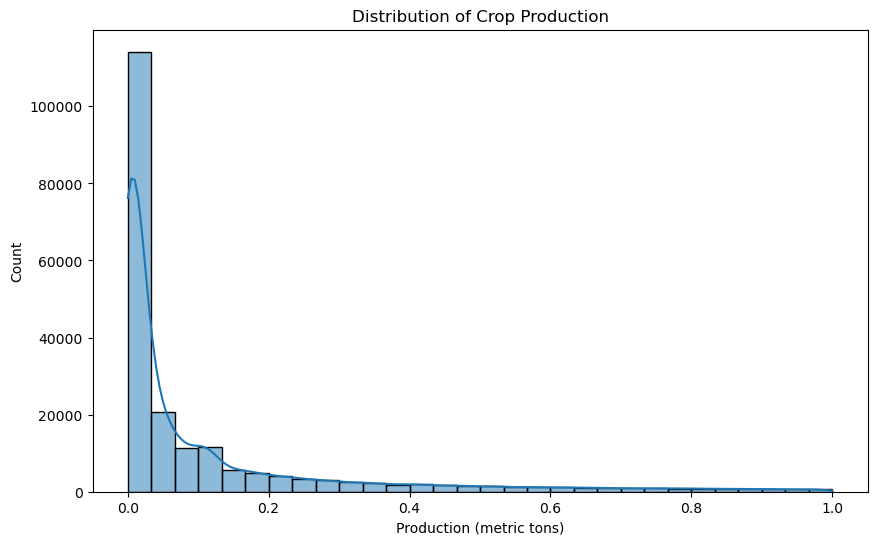

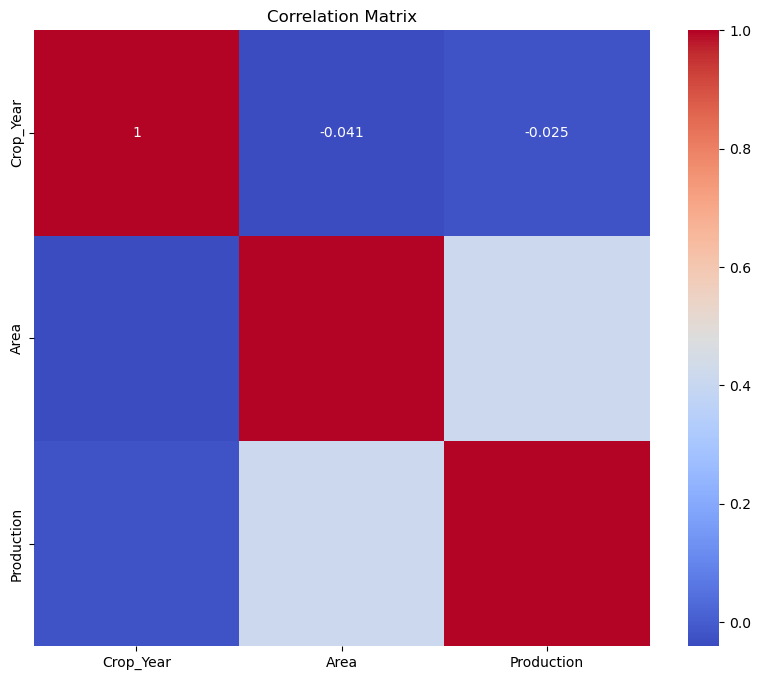

In [15]:
# Visualizing distribution of production
plt.figure(figsize=(10, 6))
sns.histplot(crop_production['Production'], bins=30, kde=True)
plt.title('Distribution of Crop Production')
plt.xlabel('Production (metric tons)')
plt.ylabel('Count')
plt.show()

# Exploring correlations
plt.figure(figsize=(10, 8))
corr_matrix = crop_production[['Crop_Year', 'Area', 'Production']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()